In [ ]:
import numpy as np
import pandas as pd
import matplotlib
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Menstrual-survey_XG.csv")

In [ ]:
df.head()

,cramps,severity_cramps,therapies,duration,flow_of_menstrual_cycle,management_of_menstrual_cycle\n\n,mindset,mood,menstrual_product,area,weakness_during_periods,pain_in_abdomen_Idysmenorrheal,cycle_track,consulted,water_amount,feelings,depression_or_anxiety\n,societal_myths \n
0,5,4,7,6,2,1,3,4,2,1,1,1,2,2,1,5,4,2
1,4,4,6,5,2,1,3,3,3,3,3,2,2,2,2,2,3,4
2,2,2,6,5,2,1,2,3,3,1,3,3,1,2,1,2,2,2
3,2,3,5,4,2,1,2,4,3,1,1,2,3,1,1,5,3,2
4,3,3,6,6,2,2,1,5,3,1,1,1,2,2,3,4,1,1


In [ ]:
df.isnull().sum()

cramps                               0
 severity_cramps                     0
therapies                            0
duration                             0
flow_of_menstrual_cycle              0
management_of_menstrual_cycle\n\n    0
mindset                              0
mood                                 0
menstrual_product                    0
area                                 0
weakness_during_periods              0
pain_in_abdomen_Idysmenorrheal       0
cycle_track                          0
consulted                            0
water_amount                         0
feelings                             0
depression_or_anxiety\n              0
societal_myths \n                    0
dtype: int64

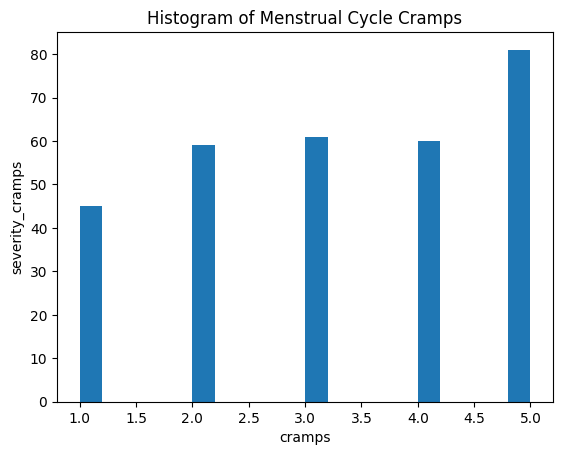

In [ ]:
# histogram
plt.hist(df['cramps'], bins=20)
plt.xlabel('cramps')
plt.ylabel('severity_cramps')
plt.title('Histogram of Menstrual Cycle Cramps')
plt.show()

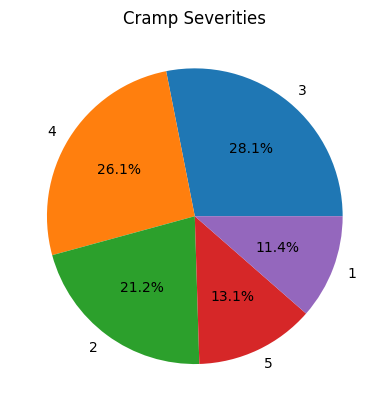

In [ ]:
# Pie chart of cramp severities
cramp_severities = df[' severity_cramps'].value_counts()
plt.pie(cramp_severities.values, labels=cramp_severities.index, autopct='%1.1f%%')
plt.title('Cramp Severities')
plt.show()

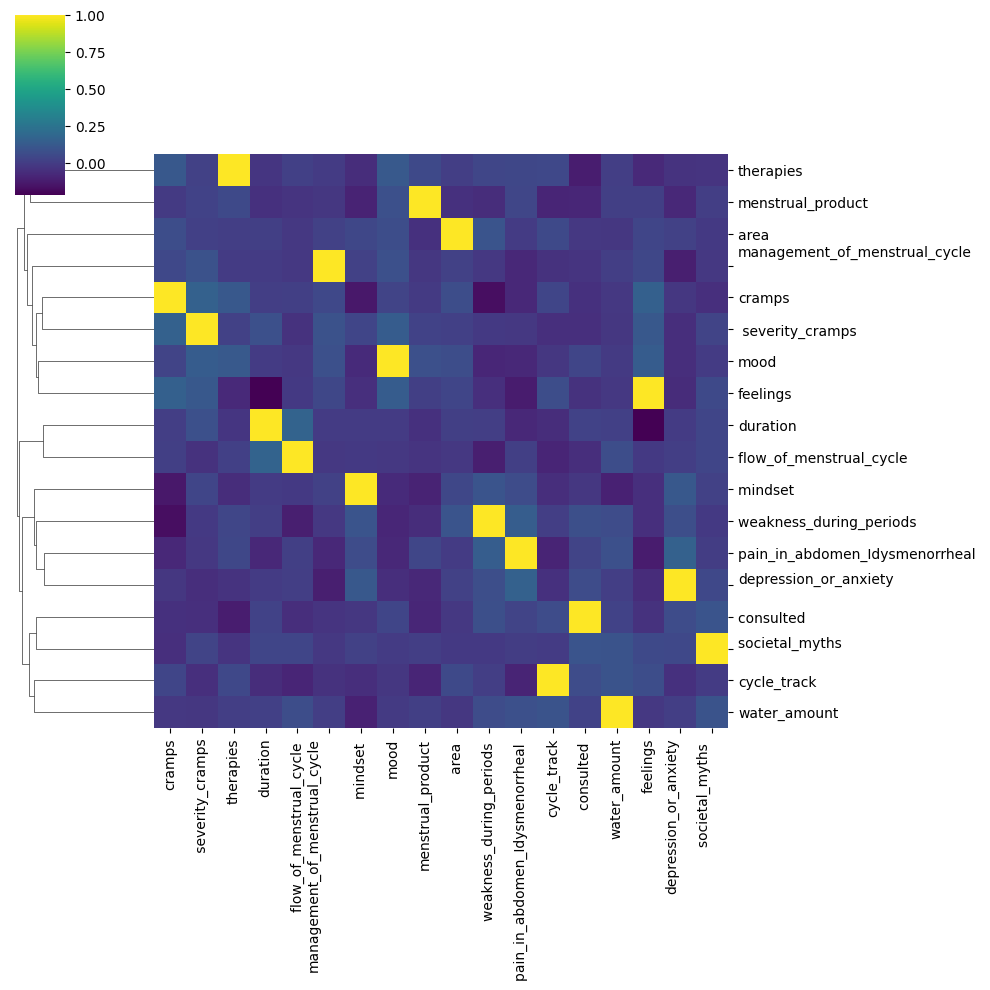

In [ ]:
sns.clustermap(df.corr(), cmap='viridis', col_cluster=False);

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,cramps,severity_cramps,therapies,duration,flow_of_menstrual_cycle,management_of_menstrual_cycle\n\n,mindset,mood,menstrual_product,area,weakness_during_periods,pain_in_abdomen_Idysmenorrheal,cycle_track,consulted,water_amount,feelings,depression_or_anxiety\n,societal_myths \n
0,5,4,7,6,2,1,3,4,2,1,1,1,2,2,1,5,4,2
1,4,4,6,5,2,1,3,3,3,3,3,2,2,2,2,2,3,4
2,2,2,6,5,2,1,2,3,3,1,3,3,1,2,1,2,2,2
3,2,3,5,4,2,1,2,4,3,1,1,2,3,1,1,5,3,2
4,3,3,6,6,2,2,1,5,3,1,1,1,2,2,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,5,4,7,3,2,1,3,4,3,3,3,3,2,1,1,5,2,2
302,4,3,3,4,2,1,3,3,3,2,3,1,3,2,3,5,1,3
303,4,3,5,5,3,1,2,3,3,2,3,1,3,2,3,4,4,4
304,2,4,7,4,1,1,3,5,3,1,3,1,1,3,2,3,1,3


cramps , severity_cramps ,mindset ,mood

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
df2 = df[["cramps"," severity_cramps","mindset ","mood"]].copy()

In [ ]:
X = df2[["cramps"," severity_cramps","mindset ","mood"]].values
X

array([[5, 4, 3, 4],
       [4, 4, 3, 3],
       [2, 2, 2, 3],
       ...,
       [4, 3, 2, 3],
       [2, 4, 3, 5],
       [1, 1, 4, 4]])

In [ ]:
df2.head()

,cramps,severity_cramps,mindset,mood
0,5,4,3,4
1,4,4,3,3
2,2,2,2,3
3,2,3,2,4
4,3,3,1,5


In [ ]:
k_range = range(1, 4)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


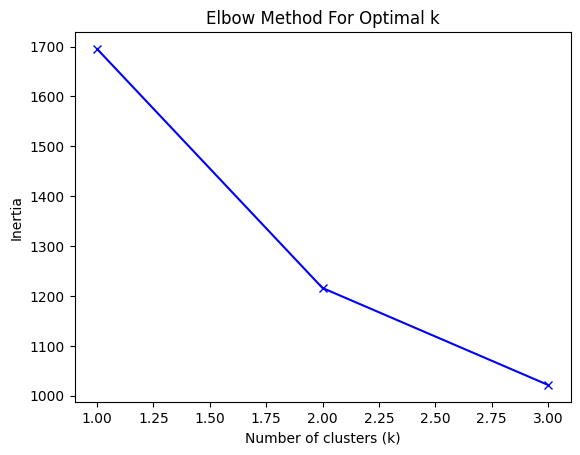

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

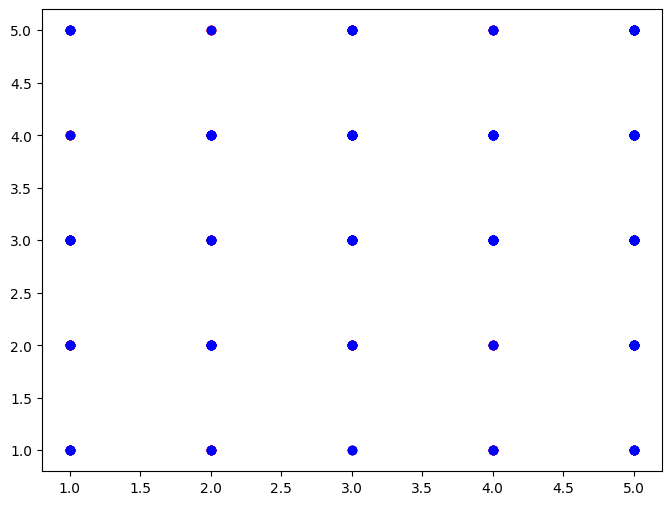

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r','b']
for i in range(2):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster '+str(i+1))

In [ ]:
k_means_labels = kmeans.fit_predict(df2)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,cramps,severity_cramps,mindset,mood,labels
0,5,4,3,4,1
1,4,4,3,3,1
2,2,2,2,3,0
3,2,3,2,4,0
4,3,3,1,5,1


In [ ]:
df2.tail()

,cramps,severity_cramps,mindset,mood,labels
301,5,4,3,4,1
302,4,3,3,3,1
303,4,3,2,3,1
304,2,4,3,5,0
305,1,1,4,4,0


In [ ]:
df2.head()

,cramps,severity_cramps,mindset,mood,labels
0,5,4,3,4,1
1,4,4,3,3,1
2,2,2,2,3,0
3,2,3,2,4,0
4,3,3,1,5,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=23, random_state=3)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
import pickle
filename='savemodel.pkl'
pickle.dump(clf, open(filename ,'wb'))

In [ ]:
X_test.head()

,cramps,severity_cramps,mindset,mood
182,5,1,3,3
154,4,4,2,5
111,5,5,1,5
203,4,4,2,2
60,3,3,2,5


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[5,4,3,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

management_of_menstrual_cycle,
menstrual_product	,
area,
consult
mindset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
X = df[["management_of_menstrual_cycle\n\n" , "menstrual_product" ,"area " ,"mindset ","consulted "]].values
X

array([[1, 2, 1, 3, 2],
       [1, 3, 3, 3, 2],
       [1, 3, 1, 2, 2],
       ...,
       [1, 3, 2, 2, 2],
       [1, 3, 1, 3, 3],
       [1, 3, 1, 4, 2]])

In [ ]:
df2 = df[["management_of_menstrual_cycle\n\n" , "menstrual_product" ,"area " ,"mindset ","consulted "]].copy()
X = df2[["management_of_menstrual_cycle\n\n" , "menstrual_product" ,"area " ,"mindset ","consulted "]].values
X

array([[1, 2, 1, 3, 2],
       [1, 3, 3, 3, 2],
       [1, 3, 1, 2, 2],
       ...,
       [1, 3, 2, 2, 2],
       [1, 3, 1, 3, 3],
       [1, 3, 1, 4, 2]])

In [ ]:
df2.head()

,management_of_menstrual_cycle\n\n,menstrual_product,area,mindset,consulted
0,1,2,1,3,2
1,1,3,3,3,2
2,1,3,1,2,2
3,1,3,1,2,1
4,2,3,1,1,2


In [ ]:
k_range = range(1, 5)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


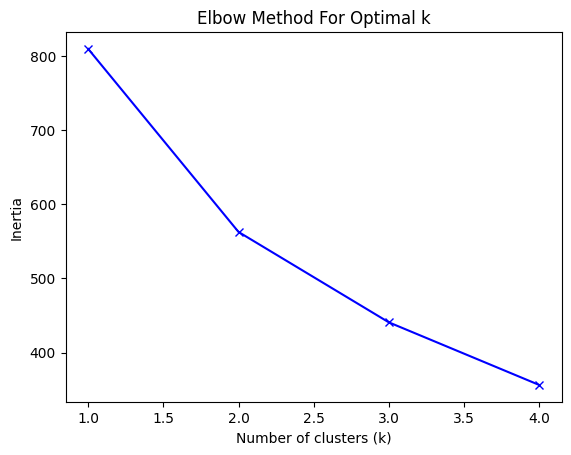

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

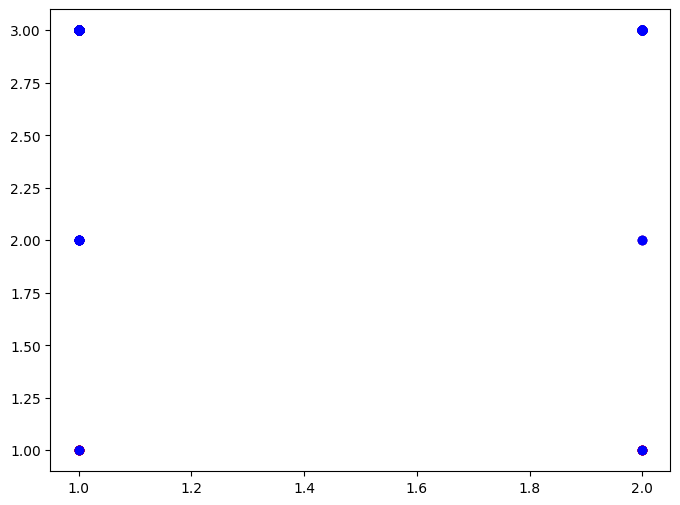

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r','b']
for i in range(2):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster '+str(i+1))

In [ ]:
k_means_labels = kmeans.fit_predict(df2)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,management_of_menstrual_cycle\n\n,menstrual_product,area,mindset,consulted,labels
0,1,2,1,3,2,1
1,1,3,3,3,2,1
2,1,3,1,2,2,0
3,1,3,1,2,1,0
4,2,3,1,1,2,0


In [ ]:
df2.tail()

,management_of_menstrual_cycle\n\n,menstrual_product,area,mindset,consulted,labels
301,1,3,3,3,1,1
302,1,3,2,3,2,1
303,1,3,2,2,2,0
304,1,3,1,3,3,1
305,1,3,1,4,2,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
import pickle
filename='savemodel1.pkl'
pickle.dump(clf, open(filename ,'wb'))

In [ ]:
X_test.head()

,management_of_menstrual_cycle\n\n,menstrual_product,area,mindset,consulted
182,1,3,1,3,2
154,1,2,3,2,2
111,2,3,1,1,1
203,1,3,3,2,2
60,2,3,3,2,2


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[1,3,3,3,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

cycle_track , management

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
df2 = df[["cycle_track","management_of_menstrual_cycle\n\n"]].copy()

In [ ]:
X = df2[["cycle_track","management_of_menstrual_cycle\n\n"]].values
X

array([[2, 1],
       [2, 1],
       [1, 1],
       [3, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 2],
       [2, 2],
       [2, 1],
       [1, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [1, 2],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [2, 2],
       [3, 1],
       [2, 1],
       [2, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 1],
       [3, 2],
       [2, 1],
       [1, 2],
       [1, 2],
       [3, 2],
       [2, 1],
       [1, 2],
       [3, 1],
       [2, 1],
       [2, 2],
       [1, 1],
       [3, 1],
       [2, 2],
       [3, 1],
       [1, 1],
       [3, 2],
       [3, 1],
       [1, 1],
       [3, 1],
       [1, 1],
       [2, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [3, 1],
       [1, 2],
       [2, 2],
       [3, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1],
       [3,

In [ ]:
df2.head()

,cycle_track,management_of_menstrual_cycle\n\n
0,2,1
1,2,1
2,1,1
3,3,1
4,2,2


In [ ]:
k_range = range(1, 2)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


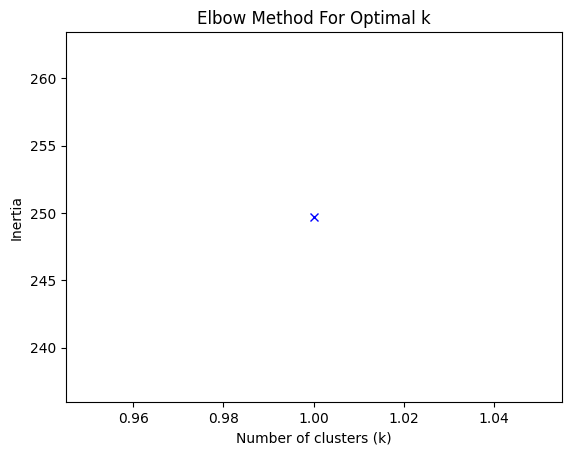

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

In [ ]:
k_means_labels = kmeans.fit_predict(df2)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,cycle_track,management_of_menstrual_cycle\n\n,labels
0,2,1,0
1,2,1,0
2,1,1,0
3,3,1,1
4,2,2,0


In [ ]:
df2.tail()

,cycle_track,management_of_menstrual_cycle\n\n,labels
301,2,1,0
302,3,1,1
303,3,1,1
304,1,1,0
305,2,1,0


In [ ]:
silhouette_avg = silhouette_score(df2, labels)
print("The silhouette score for k-means clustering with k =", k, "is", silhouette_avg)

The silhouette score for k-means clustering with k = 1 is 0.03344728434618783


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[68  0]
 [ 0 24]]


In [ ]:
import pickle
filename='savemodel3.pkl'
pickle.dump(rf, open(filename ,'wb'))

In [ ]:
X_test.head()

,cycle_track,management_of_menstrual_cycle\n\n
182,2,1
154,2,1
111,2,2
203,3,1
60,2,2


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
load_model.predict([[2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

management_of_menstrual_cycle,

*  depression_or_anxiety\n","mindset ","mood","feelings


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
X = df[["depression_or_anxiety\n","mindset ","mood","feelings"]].values
X

array([[4, 3, 4, 5],
       [3, 3, 3, 2],
       [2, 2, 3, 2],
       ...,
       [4, 2, 3, 4],
       [1, 3, 5, 3],
       [1, 4, 4, 5]])

In [ ]:
df2 = df[["depression_or_anxiety\n","mindset ","mood","feelings"]].copy()

In [ ]:
X = df2[["depression_or_anxiety\n","mindset ","mood","feelings"]].values
X

array([[4, 3, 4, 5],
       [3, 3, 3, 2],
       [2, 2, 3, 2],
       ...,
       [4, 2, 3, 4],
       [1, 3, 5, 3],
       [1, 4, 4, 5]])

In [ ]:
df2.head()

,depression_or_anxiety\n,mindset,mood,feelings
0,4,3,4,5
1,3,3,3,2
2,2,2,3,2
3,3,2,4,5
4,1,1,5,4


In [ ]:
k_range = range(1, 4)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


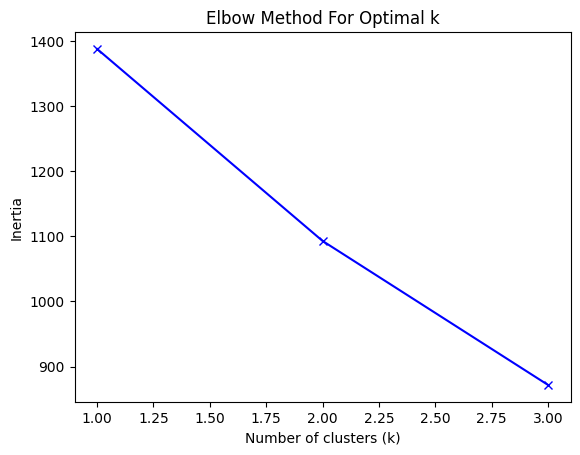

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = kmeans.labels_

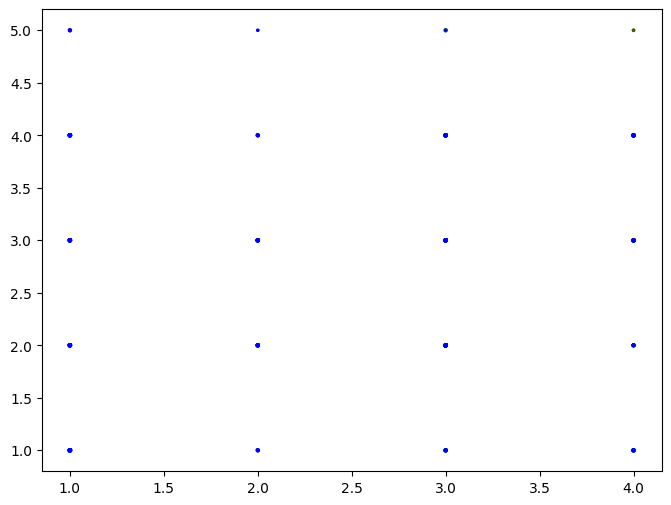

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], c=colors[i], label='Cluster '+str(i+1))

In [ ]:
k_means_labels = kmeans.fit_predict(df2)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1,
       2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1,

In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,depression_or_anxiety\n,mindset,mood,feelings,labels
0,4,3,4,5,2
1,3,3,3,2,1
2,2,2,3,2,1
3,3,2,4,5,2
4,1,1,5,4,0


In [ ]:
df2.tail()

,depression_or_anxiety\n,mindset,mood,feelings,labels
301,2,3,4,5,0
302,1,3,3,5,0
303,4,2,3,4,2
304,1,3,5,3,0
305,1,4,4,5,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:




accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9565217391304348


In [ ]:
import pickle
filename='savemodel4.pkl'
pickle.dump(clf, open(filename ,'wb'))

In [ ]:
X_test.head()

,depression_or_anxiety\n,mindset,mood,feelings
182,2,3,3,1
154,3,2,5,5
111,1,1,5,5
203,1,2,2,4
60,3,2,5,4


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[4,3,4,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mindset, pain, weakness, duration

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
X = df[["weakness_during_periods " , "duration" ,"pain_in_abdomen_Idysmenorrheal " ,"mindset "]].values


In [ ]:
df2 = df[["weakness_during_periods " , "duration" ,"pain_in_abdomen_Idysmenorrheal " ,"mindset "]].copy()

In [ ]:
X = df2[["weakness_during_periods " , "duration" ,"pain_in_abdomen_Idysmenorrheal " ,"mindset "]].values
X

array([[1, 6, 1, 3],
       [3, 5, 2, 3],
       [3, 5, 3, 2],
       ...,
       [3, 5, 1, 2],
       [3, 4, 1, 3],
       [1, 6, 2, 4]])

In [ ]:
df2.head()

,weakness_during_periods,duration,pain_in_abdomen_Idysmenorrheal,mindset
0,1,6,1,3
1,3,5,2,3
2,3,5,3,2
3,1,4,2,2
4,1,6,1,1


In [ ]:
k_range = range(1, 4)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


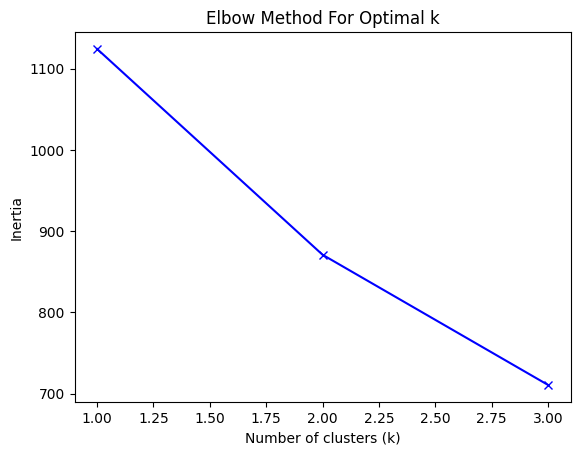

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

In [ ]:
k_means_labels = kmeans.fit_predict(df2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,weakness_during_periods,duration,pain_in_abdomen_Idysmenorrheal,mindset,labels
0,1,6,1,3,1
1,3,5,2,3,0
2,3,5,3,2,0
3,1,4,2,2,1
4,1,6,1,1,1


In [ ]:
print(df2)

     weakness_during_periods   duration  pain_in_abdomen_Idysmenorrheal   \
0                           1         6                                1   
1                           3         5                                2   
2                           3         5                                3   
3                           1         4                                2   
4                           1         6                                1   
..                        ...       ...                              ...   
301                         3         3                                3   
302                         3         4                                1   
303                         3         5                                1   
304                         3         4                                1   
305                         1         6                                2   

     mindset   labels  
0           3       1  
1           3       0  
2           2  

In [ ]:
df2.tail()

,weakness_during_periods,duration,pain_in_abdomen_Idysmenorrheal,mindset,labels
301,3,3,3,3,0
302,3,4,1,3,0
303,3,5,1,2,0
304,3,4,1,3,0
305,1,6,2,4,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9891304347826086
Confusion Matrix:
 [[40  0]
 [ 1 51]]


In [ ]:
import pickle
filename='savemodel5.pkl'
pickle.dump(rf, open(filename ,'wb'))

In [ ]:
X_test.head()

,weakness_during_periods,duration,pain_in_abdomen_Idysmenorrheal,mindset
182,1,4,3,3
154,1,4,2,2
111,1,5,1,1
203,2,5,3,2
60,1,4,3,2


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[1,6,2,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

mindset, socialMyth, depression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
X = df[["societal_myths \n" , "depression_or_anxiety\n" , "mindset "]].values


In [ ]:
df2 = df[["societal_myths \n" , "depression_or_anxiety\n" , "mindset "]].copy()

In [ ]:
X = df2[["societal_myths \n" , "depression_or_anxiety\n" , "mindset "]].values
X

array([[2, 4, 3],
       [4, 3, 3],
       [2, 2, 2],
       [2, 3, 2],
       [1, 1, 1],
       [2, 4, 4],
       [2, 1, 3],
       [2, 2, 2],
       [2, 3, 2],
       [2, 1, 3],
       [2, 4, 5],
       [3, 1, 1],
       [2, 3, 5],
       [2, 3, 1],
       [2, 1, 1],
       [4, 4, 3],
       [4, 1, 2],
       [2, 3, 2],
       [2, 3, 3],
       [4, 4, 2],
       [3, 4, 2],
       [2, 4, 4],
       [2, 3, 2],
       [4, 3, 3],
       [2, 4, 1],
       [2, 1, 1],
       [3, 1, 3],
       [2, 4, 3],
       [3, 1, 5],
       [2, 3, 4],
       [2, 2, 3],
       [1, 3, 2],
       [3, 3, 3],
       [2, 3, 2],
       [2, 1, 1],
       [4, 3, 3],
       [2, 4, 3],
       [3, 1, 2],
       [3, 3, 3],
       [3, 4, 4],
       [2, 4, 3],
       [2, 3, 2],
       [2, 3, 1],
       [2, 3, 2],
       [2, 2, 3],
       [2, 1, 1],
       [2, 4, 3],
       [2, 1, 3],
       [2, 1, 5],
       [2, 2, 4],
       [2, 3, 3],
       [2, 4, 2],
       [1, 1, 1],
       [2, 2, 3],
       [2, 3, 1],
       [3,

In [ ]:
df2.head()

,societal_myths \n,depression_or_anxiety\n,mindset
0,2,4,3
1,4,3,3
2,2,2,2
3,2,3,2
4,1,1,1


In [ ]:
k_range = range(1, 3)
inertia_values = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


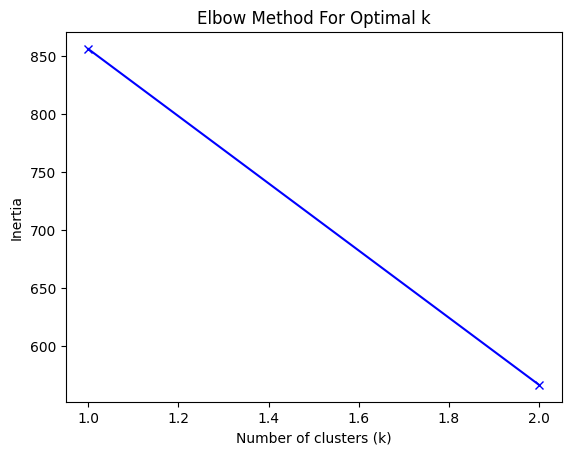

In [ ]:
plt.plot(k_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

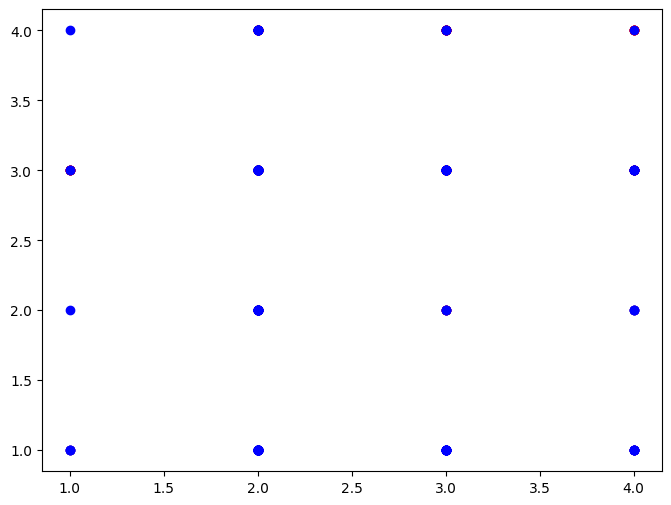

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r','b']
for i in range(2):
    ax.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster '+str(i+1))

In [ ]:
k_means_labels = kmeans.fit_predict(df2)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
df2['labels'] = k_means_labels

In [ ]:
df2.head()

,societal_myths \n,depression_or_anxiety\n,mindset,labels
0,2,4,3,0
1,4,3,3,0
2,2,2,2,1
3,2,3,2,0
4,1,1,1,1


In [ ]:
df2.tail()

,societal_myths \n,depression_or_anxiety\n,mindset,labels
301,2,2,3,1
302,3,1,3,1
303,4,4,2,0
304,3,1,3,1
305,2,1,4,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
X = df2.drop('labels', axis=1)
y = df2['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
import pickle
filename='savemodel6.pkl'
pickle.dump(clf, open(filename ,'wb'))

In [ ]:
X_test.head()

,societal_myths \n,depression_or_anxiety\n,mindset
182,2,2,3
154,2,3,2
111,2,1,1
203,2,1,2
60,3,3,2


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[2,4,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int32)